In [2]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('daily.csv')

df.head()

,campaign,actual_effective_date,original_submit_date,Month,status,volume,volume_per_day,aht,ot_hrs_per_wk,attrition_headcount,new_hire_headcount,service_level,business_days,total_staff_fte,online_production_fte
0,BRO,8/4/2017 0:00,8/4/2017 0:00,'2017-08,Implemented,9694.0,421.478261,596.0,NaN,1.0,NaN,NaN,23.0,29.0,16.0
1,BRO,8/4/2017 0:00,8/4/2017 0:00,'2017-09,Implemented,10626.0,531.300000,602.0,NaN,1.0,NaN,NaN,20.0,29.0,16.0
2,BRO,8/4/2017 0:00,8/4/2017 0:00,'2017-10,Implemented,11252.0,511.454545,609.0,NaN,1.0,NaN,NaN,22.0,29.0,17.0
3,BRO,8/4/2017 0:00,8/4/2017 0:00,'2017-11,Implemented,11265.0,536.428571,596.0,NaN,1.0,NaN,NaN,21.0,28.0,16.0
4,BRO,8/4/2017 0:00,8/4/2017 0:00,'2017-12,Implemented,12483.0,624.150000,597.0,NaN,1.0,NaN,NaN,20.0,27.0,15.0


In [3]:
df.columns

Index(['campaign', 'actual_effective_date', 'original_submit_date', 'Month',
       'status', 'volume', 'volume_per_day', 'aht', 'ot_hrs_per_wk',
       'attrition_headcount', 'new_hire_headcount', 'service_level',
       'business_days', 'total_staff_fte', 'online_production_fte'],
      dtype='object')

In [4]:
df = df[['campaign', 'actual_effective_date', 'volume_per_day', 
    'aht', 'attrition_headcount', 'new_hire_headcount', 'service_level',
   'business_days', 'total_staff_fte', 'online_production_fte']]

Text(0, 0.5, 'Null Data')

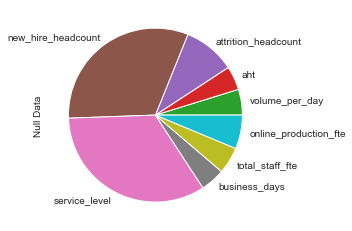

In [5]:
import seaborn as sns

sns.set_style('whitegrid')
p= (df.isnull().sum()/df.shape[0]*100)
_ = p.plot.pie()
plt.ylabel('Null Data')


There are many nulls, approximately 2/3 all nulls are `new_hireheadcount data`, and `service_level data`

In [6]:
df = df[df['aht'].notnull()]

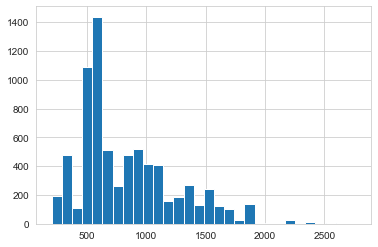

In [9]:
df['aht'][df['aht']>0].hist(bins=30)

In [85]:
df['aht'].describe()

count    7508.000000
mean      815.344600
std       418.385804
min         0.000000
25%       541.000000
50%       665.097500
75%      1050.000000
max      2765.890000
Name: aht, dtype: float64

In [90]:
df['date'].max() - df['date'].min()

Timedelta('1109 days 00:00:00')

In [ ]:
df = df[['Date','RIS Actual Volume']]

#  pre-format for prophet
df.columns = ['ds','y']

# set start date of training data
df = df[df['ds'] >= '2018-07-01']

# set end date of training data
df = df[df['ds'] < '2020-06-01']
df.head()

In [10]:
df.tail()

,campaign,actual_effective_date,volume_per_day,aht,attrition_headcount,new_hire_headcount,service_level,business_days,total_staff_fte,online_production_fte
8062,WISE,7/7/2020 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8063,WISE,7/7/2020 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8064,WISE,7/7/2020 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8065,WISE,7/7/2020 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8066,WISE,7/7/2020 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.rename(columns={'actual_effective_date': 'date'})

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df['date'].describe()

count                    8067
unique                     79
top       2020-04-28 00:00:00
freq                      684
first     2017-08-04 00:00:00
last      2020-08-17 00:00:00
Name: date, dtype: object

In [32]:
r = df.shape[0]
df.isnull().sum()/r

campaign                 0.000000
date                     0.000000
volume_per_day           0.074873
aht                      0.069295
attrition_headcount      0.151605
new_hire_headcount       0.495351
service_level            0.526218
business_days            0.071154
total_staff_fte          0.077848
online_production_fte    0.098054
dtype: float64

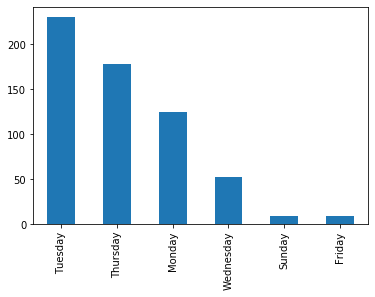

In [58]:
df[df['volume_per_day'].isnull()]['date'].dt.day_name().value_counts().plot(kind='bar')

campaign
date
volume_per_day


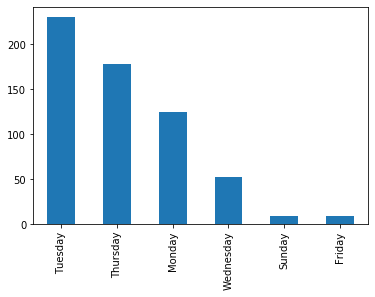

aht


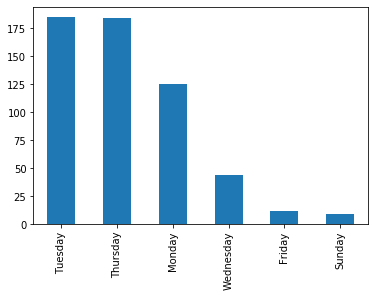

attrition_headcount


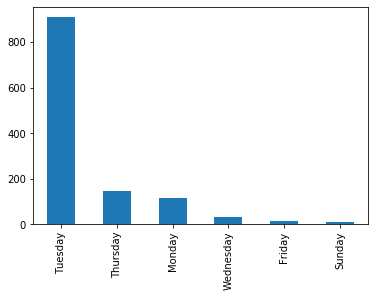

new_hire_headcount


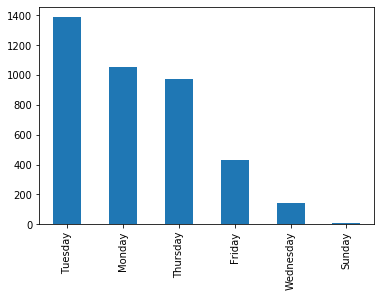

service_level


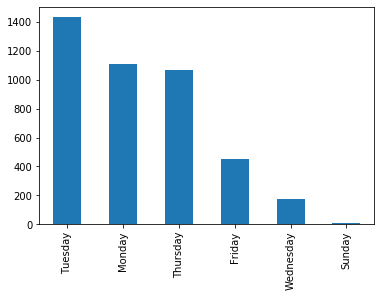

business_days


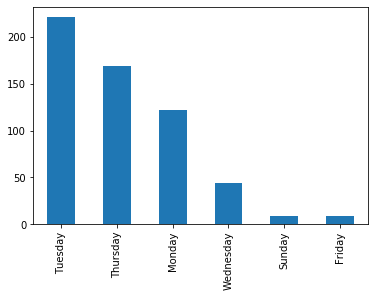

total_staff_fte


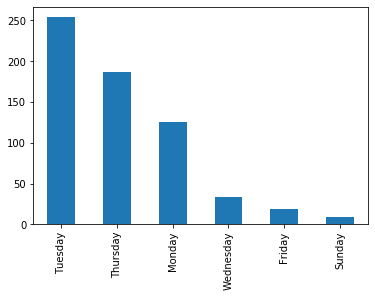

online_production_fte


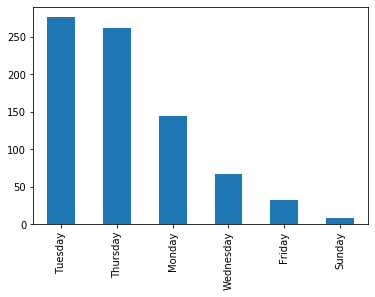

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    print(col)
    n=df[df[col].isnull()]
    try:
        n['date'].dt.day_name().value_counts().plot(kind='bar')
    except:
        continue
    plt.show()